In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
with open('../../bases/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [3]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [5]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [7]:
from sklearn.naive_bayes import GaussianNB

naive_census_data = GaussianNB()
naive_census_data.fit(X_census_treinamento, Y_census_treinamento)

GaussianNB()

In [8]:
previsoes = naive_census_data.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [9]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
accuracy_score(Y_census_teste, previsoes)

0.4767656090071648

In [13]:
confusion_matrix(Y_census_teste, previsoes)

array([[1172, 2521],
       [  35, 1157]], dtype=int64)

In [14]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



In [16]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

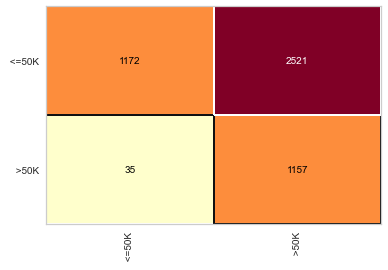

In [17]:
cm = ConfusionMatrix(naive_census_data)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)